# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [50]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [51]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [52]:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [53]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [54]:
pd.date_range(start='1-1-2018 00:00:00', end='1-1-2018 00:29:10', periods=1751, freq=None)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [55]:
# Juan, no entiendo esto: 'The frequency should be set to infer' meterle frequency?

# Esque solo se pueden meter 3 parametros
# ERROR: 'Of the four parameters: start, end, periods, and freq, exactly three must be specified'

Assign the time series index to the dataframe's index.

In [56]:
sensor['Time'] = pd.date_range(start='1-1-2018 00:00:00', end='1-1-2018 00:29:10', periods=1751, freq=None)

In [57]:
sensor.set_index('Time').head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
Time,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [63]:
import statsmodels.api as sm
from matplotlib.pyplot import figure
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

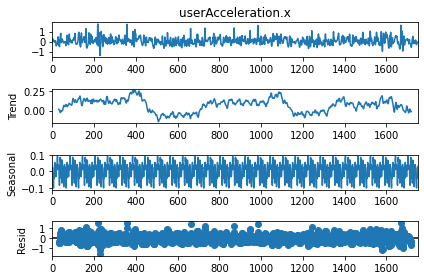

<Figure size 640x480 with 0 Axes>

In [67]:
decompose = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period=60)

decompose.plot()
figure(figsize=(8, 6), dpi=80)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<Figure size 640x480 with 0 Axes>

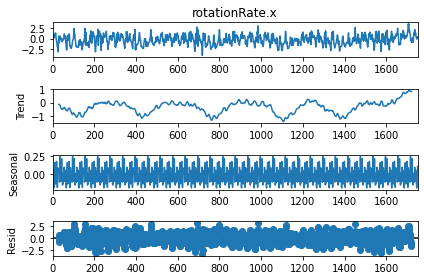

<Figure size 640x480 with 0 Axes>

In [69]:
# Your code here:

decompose2 = seasonal_decompose(sensor['rotationRate.x'], model="additive", period=60)

decompose2.plot()
figure(figsize=(8, 6), dpi=80)

In [ ]:
# sé que están mal por que no aparece el tiempo pero no sé muy bien porqué. 
# Aun no lo entiendo, al final vuelvo a esta parte.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

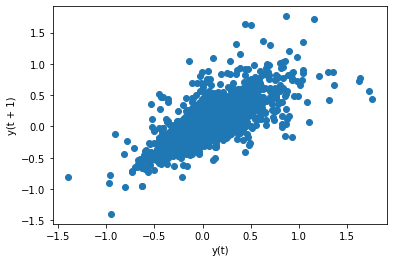

In [72]:
# Your code here:

from pandas.plotting import lag_plot

lag_plot(sensor['userAcceleration.x'])
plt.show()

Create a lag plot for `rotationRate.x`

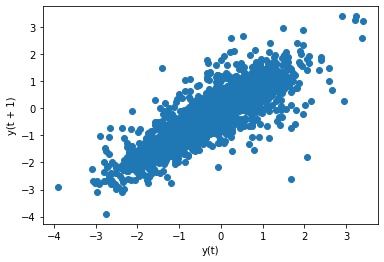

In [74]:
# Your code here:

lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

In [98]:
# Your conclusions here:

'''
La tendencia es similar: positiva y fuerte en ambas variables
''';

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [102]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

stationarity_test_userAcceleration = adfuller(sensor['userAcceleration.x'])
stationarity_test_rotationRate = adfuller(sensor['rotationRate.x'])


print(stationarity_test_userAcceleration)
print(stationarity_test_rotationRate)

(-17.957994086169762, 2.823439483037483e-30, 4, 1746, {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}, -727.6140124402791)
(-5.2698606250864355, 6.320230335911768e-06, 25, 1725, {'1%': -3.4341465551936534, '5%': -2.863216966926812, '10%': -2.567662770090317}, 2619.6049719981947)


In [116]:
print(f"userAcceleration variable:\nADF value = {str(stationarity_test_userAcceleration[0])} \np-vale = {str(stationarity_test_userAcceleration[1])} \n")
print(f"rotationRate variable:\nADF value = {str(stationarity_test_rotationRate[0])} \np-vale = {str(stationarity_test_rotationRate[1])} ")

userAcceleration variable:
ADF value = -17.957994086169762 
p-vale = 2.823439483037483e-30 

rotationRate variable:
ADF value = -5.2698606250864355 
p-vale = 6.320230335911768e-06 


What are your conclusions from this test?

In [13]:
# Your conclusions here:

'''
The null hypothesis for both tests is that the data are non-stationary. 
We want to REJECT the null hypothesis for this test, so we want a p-value of less that 0.05 (or smaller).

Our p-values are defenetly smaller than 0.05 so we can assume both variables are stationary.

In both cases, ADF value is smaller than the 1% confidence value, which is another way of confirming that the variables are stationary.

Critical values: for a 95% confidence interval, both variables have similar results.
userAcceleration variable: -2.863196780129223
rotationRate variable: -2.863216966926812
'''

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [125]:
sensor.tail(10)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Time
1741,1.634509,-0.539902,2.480230,0.856019,0.514052,0.054613,1.065054,2.373071,-0.040047,0.149749,-0.137389,-0.023470,2018-01-01 00:29:01
1742,1.671799,-0.541547,2.463982,0.852545,0.515462,0.086403,0.497726,2.192886,-0.042711,0.038461,-0.045660,0.013450,2018-01-01 00:29:02
1743,1.707251,-0.545910,2.455201,0.846711,0.519196,0.116260,0.426906,1.919032,-0.227657,-0.169175,-0.000015,0.134503,2018-01-01 00:29:03
1744,1.739734,-0.551012,2.445058,0.839866,0.523550,0.143251,0.414523,1.851654,-0.150745,-0.300361,0.030939,0.114638,2018-01-01 00:29:04
1745,1.771197,-0.555716,2.441679,0.832521,0.527551,0.169107,0.027461,1.528635,-0.287630,-0.270174,0.096304,0.033270,2018-01-01 00:29:05
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874,2018-01-01 00:29:06
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738,2018-01-01 00:29:07
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740,2018-01-01 00:29:08
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441,2018-01-01 00:29:09
1750,1.869375,-0.596783,2.433775,0.790551,0.561984,0.243315,0.291873,1.102207,-0.436925,-0.065011,-0.042575,0.046052,2018-01-01 00:29:10


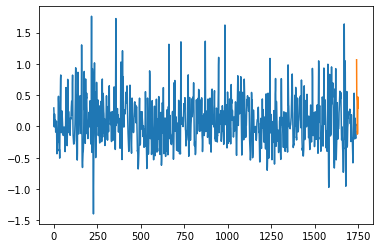

In [130]:
# Your code here:

from statsmodels.tsa.arima.model import ARIMA

train = sensor['userAcceleration.x'][:1740]
test = sensor['rotationRate.x'][-10:]

plt.plot(train)
plt.plot(test)


In [137]:
%%capture
statsmodels.tsa.arima_model.ARMA(sensor['userAcceleration.x'], order=(2,1))


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:

